# importing libraries

In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# loading the data set

In [36]:
df=pd.read_csv("C:\\Users\\imad shingeti\\Downloads\\Data Analysis - Hotel Booking-20230409T081722Z-001\\Data Analysis - Hotel Booking\\hotel_bookings 2.csv")

# Exploratory data analysis

In [37]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,1/7/2015
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,1/7/2015
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2/7/2015
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2/7/2015
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,3/7/2015


In [74]:
df['hotel'].unique()

array(['Resort Hotel', 'City Hotel'], dtype=object)

In [38]:
df.shape

(119390, 32)

In [39]:
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [41]:
df['reservation_status_date']=pd.to_datetime(df['reservation_status_date'])

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   hotel                           119390 non-null  object        
 1   is_canceled                     119390 non-null  int64         
 2   lead_time                       119390 non-null  int64         
 3   arrival_date_year               119390 non-null  int64         
 4   arrival_date_month              119390 non-null  object        
 5   arrival_date_week_number        119390 non-null  int64         
 6   arrival_date_day_of_month       119390 non-null  int64         
 7   stays_in_weekend_nights         119390 non-null  int64         
 8   stays_in_week_nights            119390 non-null  int64         
 9   adults                          119390 non-null  int64         
 10  children                        119386 non-null  float64

In [43]:
df.describe(include="object")

,hotel,arrival_date_month,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,deposit_type,customer_type,reservation_status
count,119390,119390,119390,118902,119390,119390,119390,119390,119390,119390,119390
unique,2,12,5,177,8,5,10,12,3,4,3
top,City Hotel,August,BB,PRT,Online TA,TA/TO,A,A,No Deposit,Transient,Check-Out
freq,79330,13877,92310,48590,56477,97870,85994,74053,104641,89613,75166


In [44]:
for col in df.describe(include="object").columns:
    print(col)
    print(df[col].unique())
    print('-'*50)

hotel
['Resort Hotel' 'City Hotel']
--------------------------------------------------
arrival_date_month
['July' 'August' 'September' 'October' 'November' 'December' 'January'
 'February' 'March' 'April' 'May' 'June']
--------------------------------------------------
meal
['BB' 'FB' 'HB' 'SC' 'Undefined']
--------------------------------------------------
country
['PRT' 'GBR' 'USA' 'ESP' 'IRL' 'FRA' nan 'ROU' 'NOR' 'OMN' 'ARG' 'POL'
 'DEU' 'BEL' 'CHE' 'CN' 'GRC' 'ITA' 'NLD' 'DNK' 'RUS' 'SWE' 'AUS' 'EST'
 'CZE' 'BRA' 'FIN' 'MOZ' 'BWA' 'LUX' 'SVN' 'ALB' 'IND' 'CHN' 'MEX' 'MAR'
 'UKR' 'SMR' 'LVA' 'PRI' 'SRB' 'CHL' 'AUT' 'BLR' 'LTU' 'TUR' 'ZAF' 'AGO'
 'ISR' 'CYM' 'ZMB' 'CPV' 'ZWE' 'DZA' 'KOR' 'CRI' 'HUN' 'ARE' 'TUN' 'JAM'
 'HRV' 'HKG' 'IRN' 'GEO' 'AND' 'GIB' 'URY' 'JEY' 'CAF' 'CYP' 'COL' 'GGY'
 'KWT' 'NGA' 'MDV' 'VEN' 'SVK' 'FJI' 'KAZ' 'PAK' 'IDN' 'LBN' 'PHL' 'SEN'
 'SYC' 'AZE' 'BHR' 'NZL' 'THA' 'DOM' 'MKD' 'MYS' 'ARM' 'JPN' 'LKA' 'CUB'
 'CMR' 'BIH' 'MUS' 'COM' 'SUR' 'UGA' 'BGR' 'CIV' 'J

# cleaning data

Cleaning data is crucial step before EDA as it will remove the ambigous data that can affect the outcome of EDA.

While cleaning data we will perform following steps: \

Remove duplicate rows \
Handling missing values. \
Convert columns to appropriate datatypes. \
Adding impoertant columns

# Step 1: Removing duplicate rows if any

In [75]:
df[df.duplicated()].shape # Show no. of rows of duplicate rows duplicate rows

(31984, 31)

In [77]:
# Dropping duplicate values
df.drop_duplicates(inplace = True)

In [78]:
df.shape

(86913, 31)

# Step2: Handling missing values

In [45]:
df.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [46]:
df.drop(['company','agent'], axis =1, inplace =True)
df.dropna(inplace =True)

In [47]:
df.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces       0
total_of_special_requests   

In [48]:
df=df[df['adr']<5000]

# Step 3: Adding important columns.

In [80]:
# Adding total staying days in hotels
df['total_stay'] = df['stays_in_weekend_nights']+df['stays_in_week_nights']

# Adding total people num as column, i.e. total people num = num of adults + children + babies
df['total_people'] = df['adults']+df['children']+df['babies']

# Data Analysis and visualization

0    0.628653
1    0.371347
Name: is_canceled, dtype: float64


<BarContainer object of 2 artists>

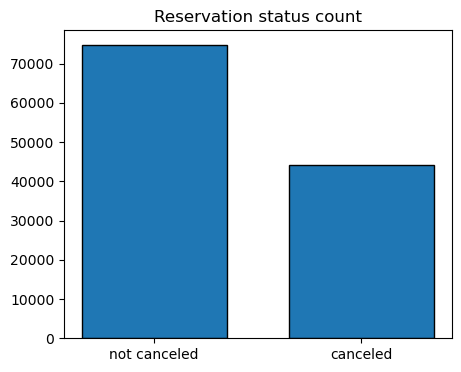

In [49]:
cancalled_perc =df['is_canceled'].value_counts(normalize = True)
print(cancalled_perc)

plt.figure(figsize=(5,4))
plt.title('Reservation status count')
plt.bar(['not canceled','canceled'],df['is_canceled'].value_counts(),edgecolor='k',width=0.7)

The above bar graph show the percentage of reservations that are cancelled and those that not. it is observed that there are still a significant number of reservations that have not been cancelled .They are still 37% client to cancel the reservation which has significant impact on the hotel earning

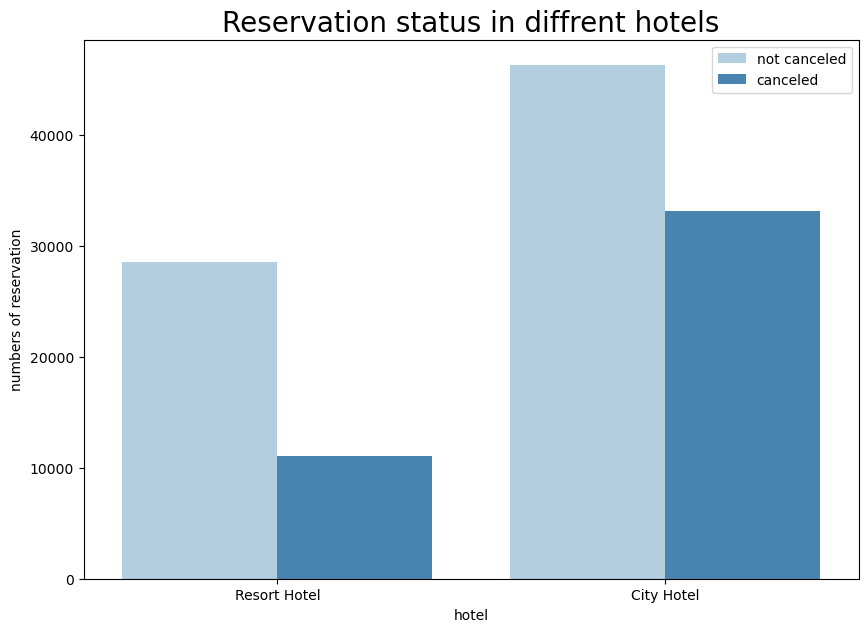

In [61]:
plt.figure(figsize=(10,7))
a=sns.countplot(x='hotel',hue='is_canceled',data=df,palette='Blues')
legend_labels,_=a.get_legend_handles_labels()   

plt.title('Reservation status in diffrent hotels',size=20)
plt.xlabel('hotel')
plt.ylabel('numbers of reservation')
plt.legend(['not canceled','canceled'])
plt.show()

In comparsion to Resort hotels, city hotels have bookings. it possible that Resort hotel are more expensive than those in cities

In [51]:
resort_hotel=df[df['hotel']=='Resort Hotel']
resort_hotel['is_canceled'].value_counts(normalize = True)

0    0.72025
1    0.27975
Name: is_canceled, dtype: float64

In [52]:
city_hotel=df[df['hotel']=='City Hotel']
city_hotel['is_canceled'].value_counts(normalize = True)

0    0.582918
1    0.417082
Name: is_canceled, dtype: float64

In [53]:
resort_hotel =resort_hotel.groupby('reservation_status_date')[['adr']].mean()
city_hotel =city_hotel.groupby('reservation_status_date')[['adr']].mean()

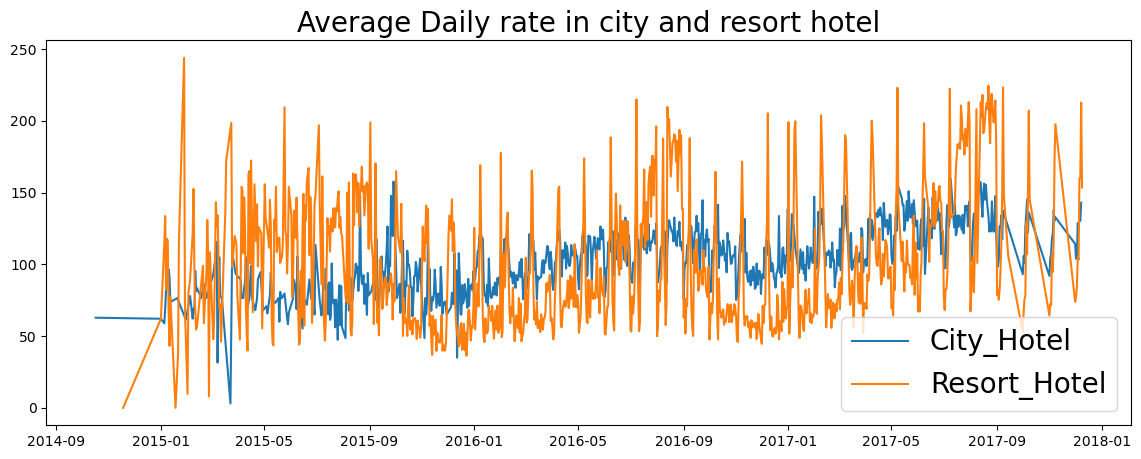

In [56]:
plt.figure(figsize=(14,5))
plt.title('Average Daily rate in city and resort hotel',size=20)
plt.plot(city_hotel.index,city_hotel['adr'],label='City_Hotel')
plt.plot(resort_hotel.index,resort_hotel['adr'],label='Resort_Hotel')
plt.legend(fontsize=20)
plt.show()

the line graph shows that on certain days the average daily rate for city hotel his less than of Resort hotel and  on other day it is even less it goes without saying that weekends and holidays lacey rising Resort Hotel rates

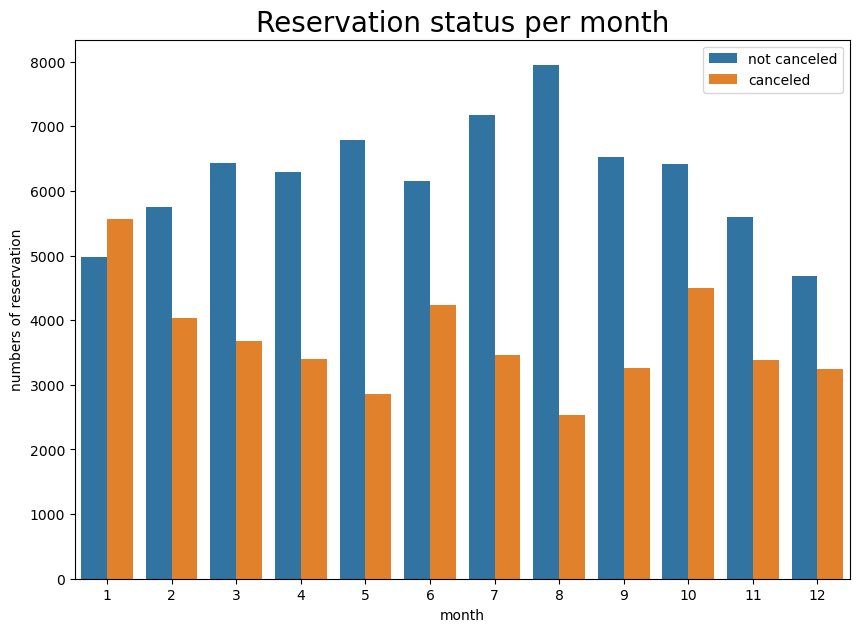

In [60]:
df['month']=df['reservation_status_date'].dt.month
plt.figure(figsize=(10,7))
a=sns.countplot(x='month',hue='is_canceled',data=df)

plt.title('Reservation status per month',size=20)
plt.xlabel('month')
plt.ylabel('numbers of reservation')
plt.legend(['not canceled','canceled'])
plt.show()

we have developed the group bar graph to analyse the month with the highest and lowest reservation levels according to reservation status as can be seen both the number of confirms reservation number of cancel reservation on Largest in the month of August where as january is the month with most cancel reservation

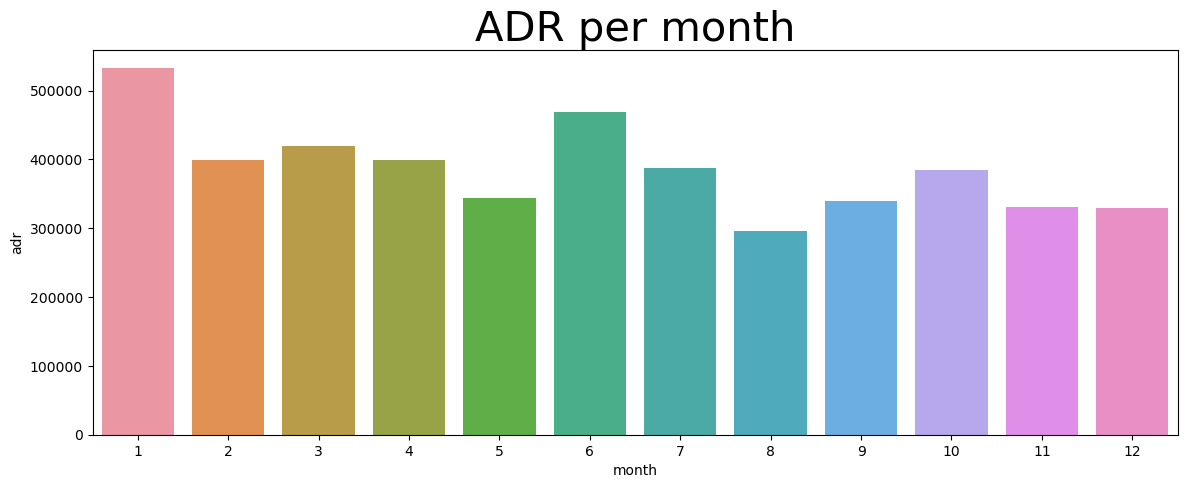

In [64]:
plt.figure(figsize=(14,5))
plt.title('ADR per month',size=30)
sns.barplot('month','adr',data=df[df['is_canceled']==1].groupby('month')[['adr']].sum().reset_index())
plt.show()

the bar graph demonstrate the cancellation on most common way price or greater and less common when they are Louis therefore the cost of the accommodation is lowered responsible for the cancellation

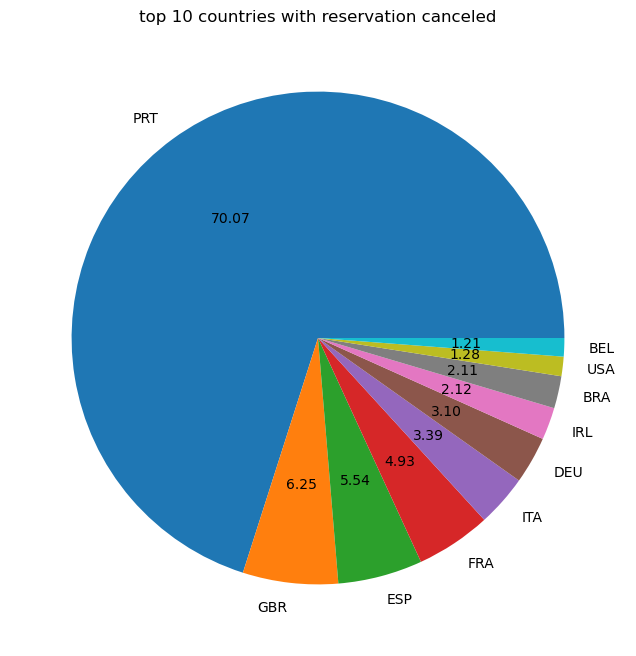

In [69]:
cancelled_data=df[df['is_canceled']==1]
top_10_country =cancelled_data['country'].value_counts()[:10]
plt.figure(figsize=(8,8))
plt.title('top 10 countries with reservation canceled')
plt.pie(top_10_country,autopct='%.2f',labels= top_10_country.index)
plt.show()

let's check the area from where does are visiting the hotel and making reservation period is coming from  dialogue or group online or offline travel agency around 46% of time come from online travel agency where 27% come from group only 4% of client book hotel directly why visiting them and baking reservation

In [70]:
df['market_segment'].value_counts()

Online TA        56402
Offline TA/TO    24159
Groups           19806
Direct           12448
Corporate         5111
Complementary      734
Aviation           237
Name: market_segment, dtype: int64

In [71]:
df['market_segment'].value_counts(normalize= True)

Online TA        0.474377
Offline TA/TO    0.203193
Groups           0.166581
Direct           0.104696
Corporate        0.042987
Complementary    0.006173
Aviation         0.001993
Name: market_segment, dtype: float64

In [72]:
cancelled_data['market_segment'].value_counts(normalize= True)

Online TA        0.469696
Groups           0.273985
Offline TA/TO    0.187466
Direct           0.043486
Corporate        0.022151
Complementary    0.002038
Aviation         0.001178
Name: market_segment, dtype: float64

Lets see does length of stay affects the adr.


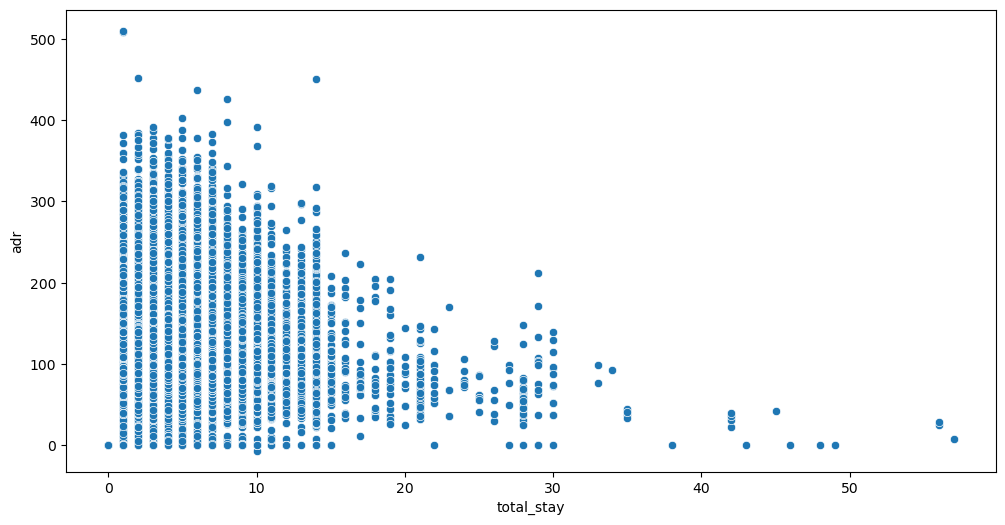

In [82]:
plt.figure(figsize = (12,6))
sns.scatterplot(y = 'adr', x = 'total_stay', data = df)
plt.show()

From the scatter plot we can see that as length of tottal_stay increases the adr decreases. This means for longer stay, the better deal for customer can be finalised.

# Some straight forward questions

Q1)Let us see from which countries most of the customers visit these hotels?

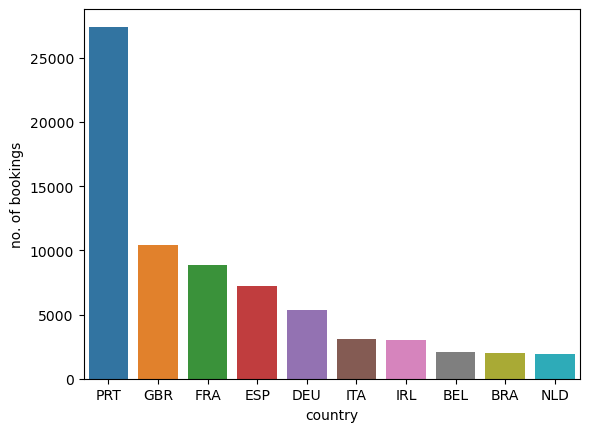

In [87]:
grp_by_country = df.groupby('country')
d2 = pd.DataFrame(grp_by_country.size()).rename(columns = {0:'no. of bookings'}).sort_values('no. of bookings', ascending = False)
d2 = d2[:10]
sns.barplot(x = d2.index, y = d2['no. of bookings'])
plt.show()

# 1) Hotel wise analysis


Q1) What is percentage of bookings in each hotel?

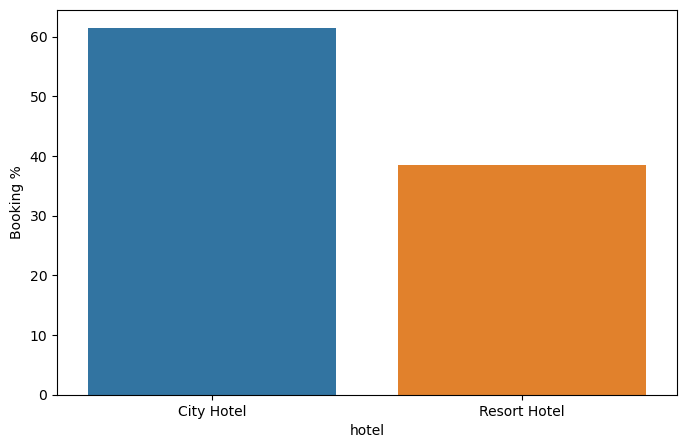

In [89]:
grouped_by_hotel = df.groupby('hotel')
d1 = pd.DataFrame((grouped_by_hotel.size()/df.shape[0])*100).reset_index().rename(columns = {0:'Booking %'})      #Calculating percentage
plt.figure(figsize = (8,5))
sns.barplot(x = d1['hotel'], y = d1['Booking %'] )
plt.show()

Around 60% bookings are for City hotel and 40% bookings are for Resort hotel.

Q2) which hotel seems to make more revenue?

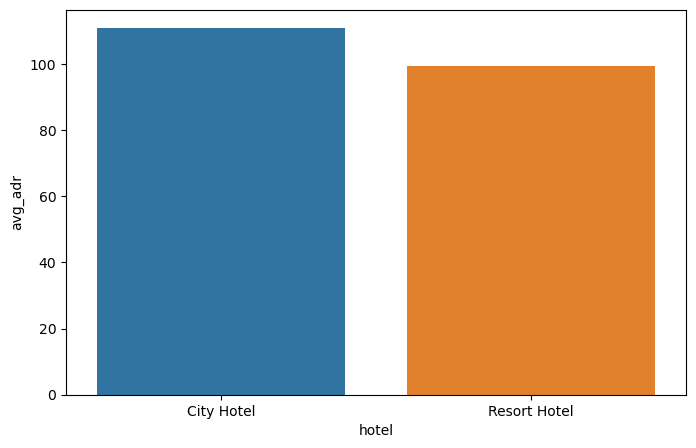

In [90]:
d3 = grouped_by_hotel['adr'].agg(np.mean).reset_index().rename(columns = {'adr':'avg_adr'})   # calculating average adr
plt.figure(figsize = (8,5))
sns.barplot(x = d3['hotel'], y = d3['avg_adr'] )
plt.show()

Avg adr of Resort hotel is slightly lower than that of City hotel. Hence, City hotel seems to be making slightly more revenue.

Q3) Which hotel has higher lead time?

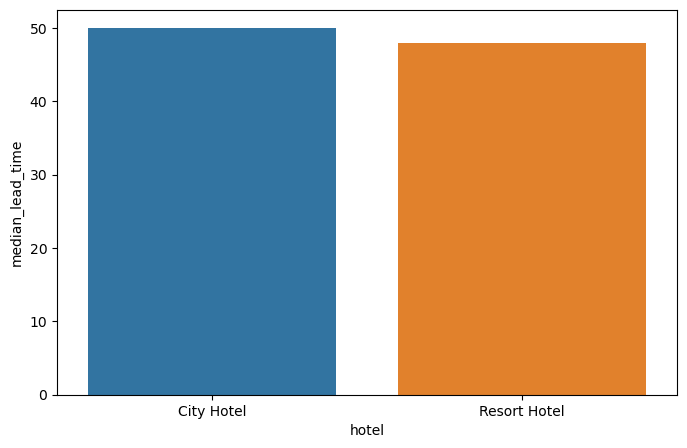

In [91]:
d2 = grouped_by_hotel['lead_time'].median().reset_index().rename(columns = {'lead_time':'median_lead_time'})
plt.figure(figsize = (8,5))
sns.barplot(x = d2['hotel'], y = d2['median_lead_time'] )
plt.show()

City hotel has slightly higher median lead time. Also median lead time is significantly higher in each case, this means customers generally plan their hotel visits way to early.

Q4) What is preferred stay in each hotel?

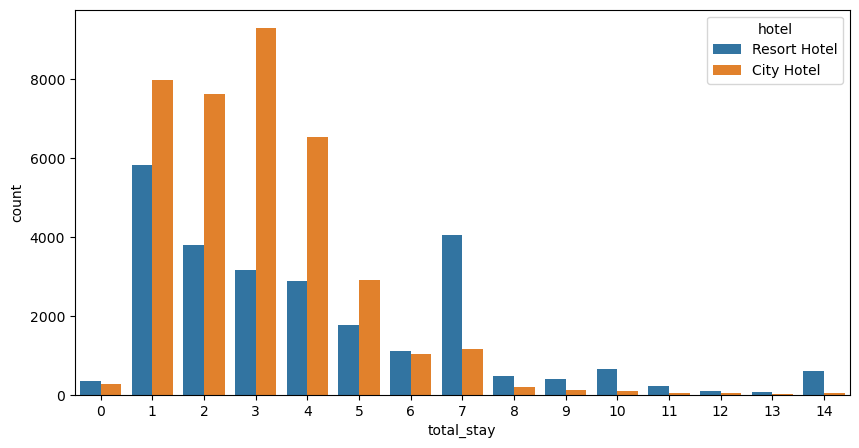

In [93]:
not_canceled = df[df['is_canceled'] == 0]
s1 = not_canceled[not_canceled['total_stay'] < 15]
plt.figure(figsize = (10,5))
sns.countplot(x = s1['total_stay'], hue = s1['hotel'])
plt.show()

Most common stay length is less than 4 days and generally people prefer City hotel for short stay, but for long stays, Resort Hotel is preferred.

Q5) Which hotel has longer waiting time?

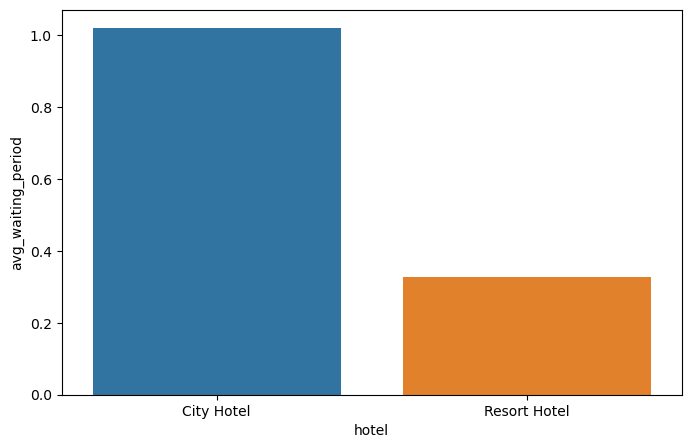

In [94]:

d5 = pd.DataFrame(grouped_by_hotel['days_in_waiting_list'].agg(np.mean).reset_index().rename(columns = {'days_in_waiting_list':'avg_waiting_period'}))
plt.figure(figsize = (8,5))
sns.barplot(x = d5['hotel'], y = d5['avg_waiting_period'] )
plt.show()

City hotel has significantly longer waiting time, hence City Hotel is much busier than Resort Hotel.

Q6) Which hotel has higher bookings cancellation rate

In [96]:
# Selecting and counting number of cancelled bookings for each hotel.
cancelled_data = df[df['is_canceled'] == 1]
cancel_grp = cancelled_data.groupby('hotel')
D1 = pd.DataFrame(cancel_grp.size()).rename(columns = {0:'total_cancelled_bookings'})

# Counting total number of bookings for each type of hotel
grouped_by_hotel = df.groupby('hotel')
total_booking = grouped_by_hotel.size()
D2 = pd.DataFrame(total_booking).rename(columns = {0: 'total_bookings'})
D3 = pd.concat([D1,D2], axis = 1)

# Calculating cancel percentage 
D3['cancel_%'] = round((D3['total_cancelled_bookings']/D3['total_bookings'])*100,2)
D3


,total_cancelled_bookings,total_bookings,cancel_%
hotel,,,
City Hotel,16038,53403,30.03
Resort Hotel,7944,33510,23.71


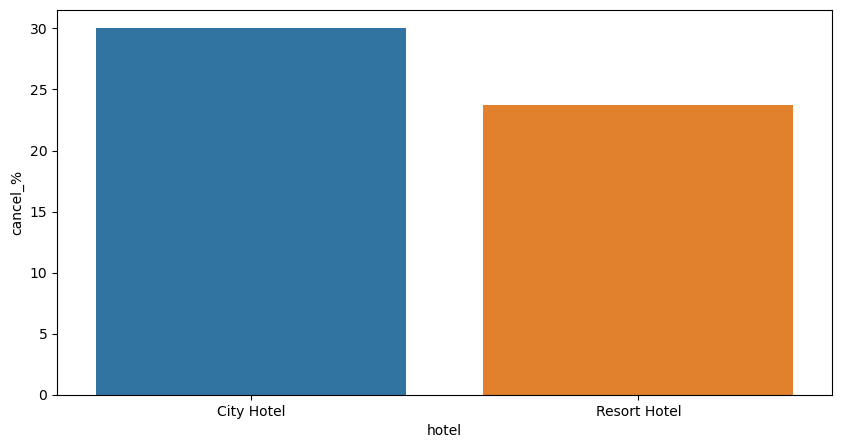

In [97]:
plt.figure(figsize = (10,5))
sns.barplot(x = D3.index, y = D3['cancel_%'])
plt.show()


Almost 30 % of City Hotel bookings got canceled.

Q7) Which hotel has high chance that its customer will return for another stay?

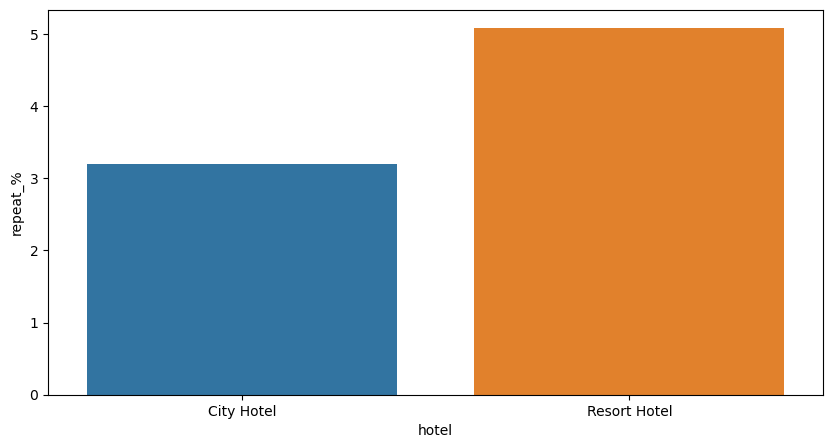

In [98]:
# Selecting and countig repeated customers bookings
repeated_data = df[df['is_repeated_guest'] == 1]
repeat_grp = repeated_data.groupby('hotel')
D1 = pd.DataFrame(repeat_grp.size()).rename(columns = {0:'total_repeated_guests'})

# Counting total bookings
total_booking = grouped_by_hotel.size()
D2 = pd.DataFrame(total_booking).rename(columns = {0: 'total_bookings'})
D3 = pd.concat([D1,D2], axis = 1)

# Calculating repeat %
D3['repeat_%'] = round((D3['total_repeated_guests']/D3['total_bookings'])*100,2)

plt.figure(figsize = (10,5))
sns.barplot(x = D3.index, y = D3['repeat_%'])
plt.show()

### Both hotels have very small percentage that customer will repeat, but Resort hotel has slightly higher repeat % than City Hotel.

# (2) Distribution Channel wise Analysis
#### Q2) Which channel is mostly used for early booking of hotels?

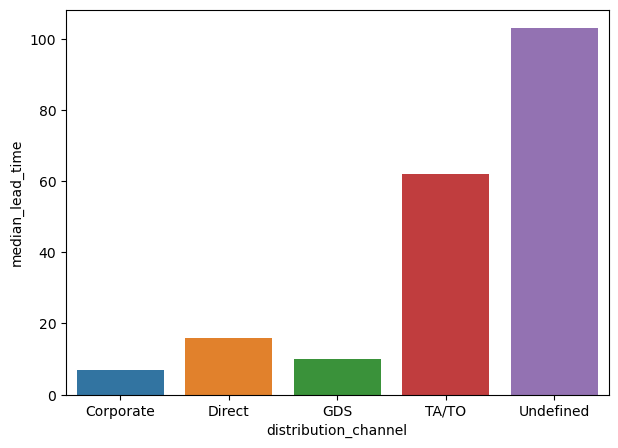

In [100]:
group_by_dc = df.groupby('distribution_channel')
d2 = pd.DataFrame(round(group_by_dc['lead_time'].median(),2)).reset_index().rename(columns = {'lead_time': 'median_lead_time'})
plt.figure(figsize = (7,5))
sns.barplot(x = d2['distribution_channel'], y = d2['median_lead_time'])
plt.show()

TA/TO is mostly used for planning Hotel visits ahead of time. But for sudden visits other mediums are most preferred.

Q3) Which channel has longer average waiting time?

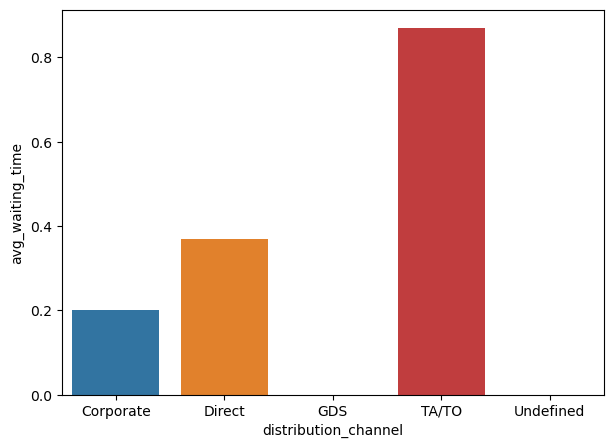

In [101]:
d4 = pd.DataFrame(round((group_by_dc['days_in_waiting_list']).mean(),2)).reset_index().rename(columns = {'days_in_waiting_list': 'avg_waiting_time'})
plt.figure(figsize = (7,5))
sns.barplot(x = d4['distribution_channel'], y = d4['avg_waiting_time'])
plt.show()

While booking via TA/TO one may have to wait a little longer to confirm booking of rooms.

Q4) Which distribution channel brings better revenue generating deals for hotels?

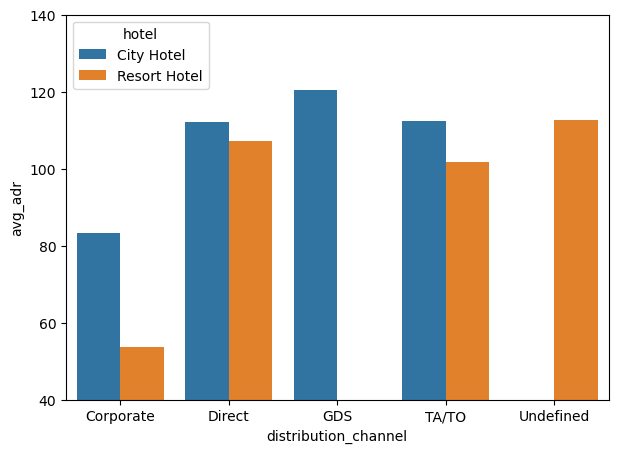

In [102]:
group_by_dc_hotel = df.groupby(['distribution_channel', 'hotel'])
d5 = pd.DataFrame(round((group_by_dc_hotel['adr']).agg(np.mean),2)).reset_index().rename(columns = {'adr': 'avg_adr'})
plt.figure(figsize = (7,5))
sns.barplot(x = d5['distribution_channel'], y = d5['avg_adr'], hue = d5['hotel'])
plt.ylim(40,140)
plt.show()

GDS channel brings higher revenue generating deals for City hotel, in contrast to that most bookings come via TA/TO. City Hotel can work to increase outreach on GDS channels to get more higher revenue generating deals.

Resort hotel has more revnue generating deals by direct and TA/TO channel. Resort Hotel need to increase outreach on GDS channel to increase revenue.

# (3) Booking cancellation Analysis
## #Let us try to understand what causes the people to cancel the booking.

#### Q1) Which significant distribution channel has highest cancellation percentage?

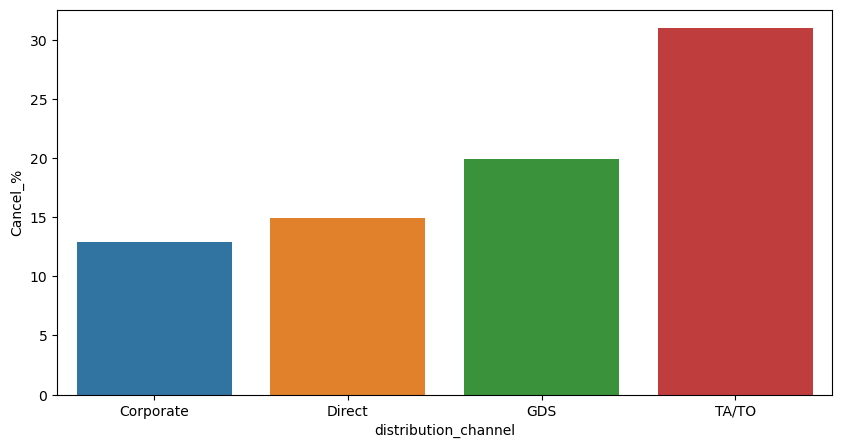

In [103]:
d1 = pd.DataFrame((group_by_dc['is_canceled'].sum()/group_by_dc.size())*100).drop(index = 'Undefined').rename(columns = {0: 'Cancel_%'})
plt.figure(figsize = (10,5))
sns.barplot(x = d1.index, y = d1['Cancel_%'])
plt.show()

TA/TO has highest booking cancellation %. Therefore, a booking via TA/TO is 30% likely to get cancelled.

Let us see what causes the cancelation of bookings of rooms by customers

One question can arise that may be longer waiting period or longer lead time causes the cancellation of bookings, let us check that.

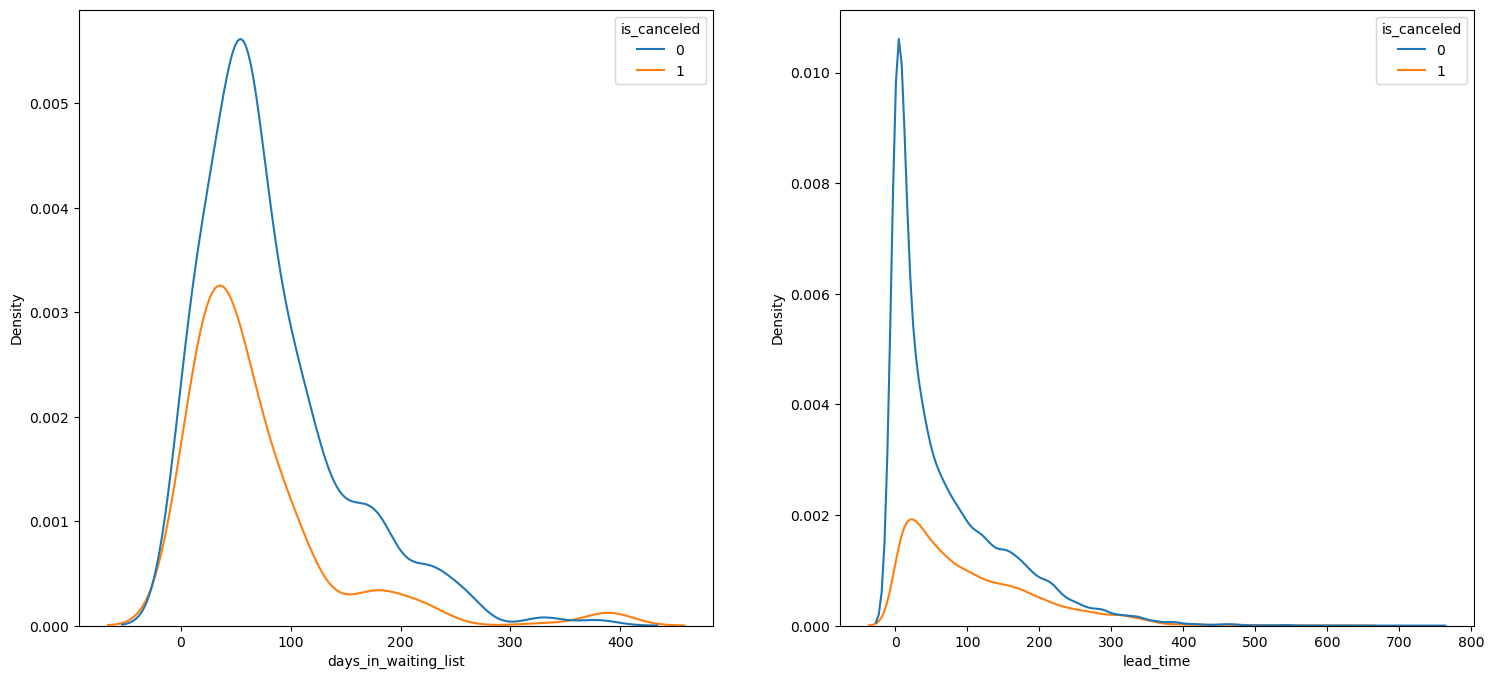

In [106]:
waiting_bookings = df[df['days_in_waiting_list'] !=0]  # Selecting bookings with non zero waiting time


fig, axes = plt.subplots(1, 2, figsize=(18, 8))
sns.kdeplot(ax=axes[0],x = 'days_in_waiting_list', hue = 'is_canceled' , data = waiting_bookings)
sns.kdeplot(ax = axes[1], x = df['lead_time'], hue = df['is_canceled'])
plt.show()

We see that most of the bookings that are cancelled have waiting period of less 150 days but also most of bookings that are not cancelled also have waiting period less than 150 days. Hence this shows that waiting period has no effect on cancellation of bookings.

Also, lead time has no affect on cancellation of bookings, as both curves of cancelation and not cncelation are similar for lead time too.

Now we will check whether not getting allotted the same room type as demanded is the cause of cancellation fo bookings

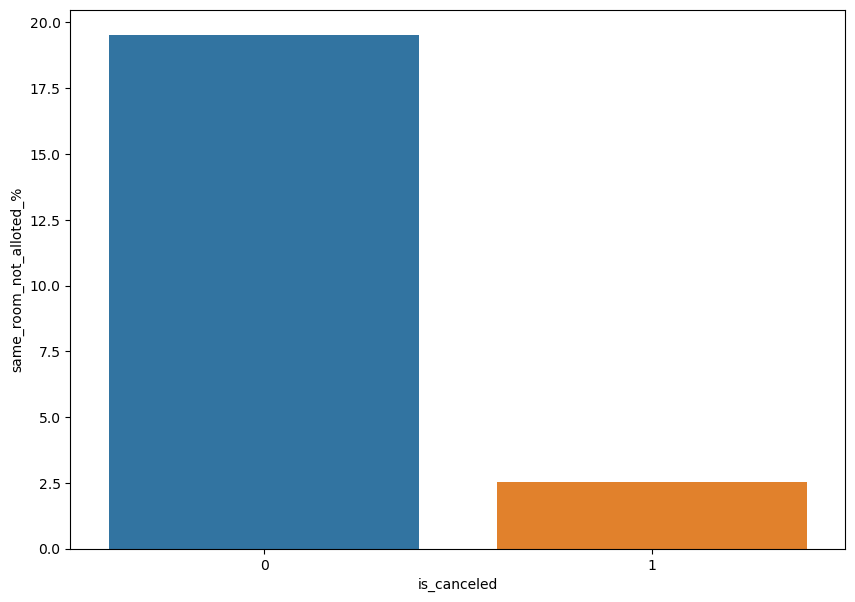

In [109]:
def check_room_allot(x):
  if x['reserved_room_type'] != x['assigned_room_type']:
    return 1
  else:
    return 0

df['same_room_not_alloted'] = df.apply(lambda x : check_room_allot(x), axis = 1)
grp_by_canc = df.groupby('is_canceled')

D3 = pd.DataFrame((grp_by_canc['same_room_not_alloted'].sum()/grp_by_canc.size())*100).rename(columns = {0: 'same_room_not_alloted_%'})
plt.figure(figsize = (10,7))
sns.barplot(x = D3.index, y = D3['same_room_not_alloted_%'])
plt.show()


We see that not getting same room as demanded is not the case of cancellation of rooms. A significant percentage of bookings are not cancelled even after getting different room as demanded.

Lets see does not getting same room affects the adr

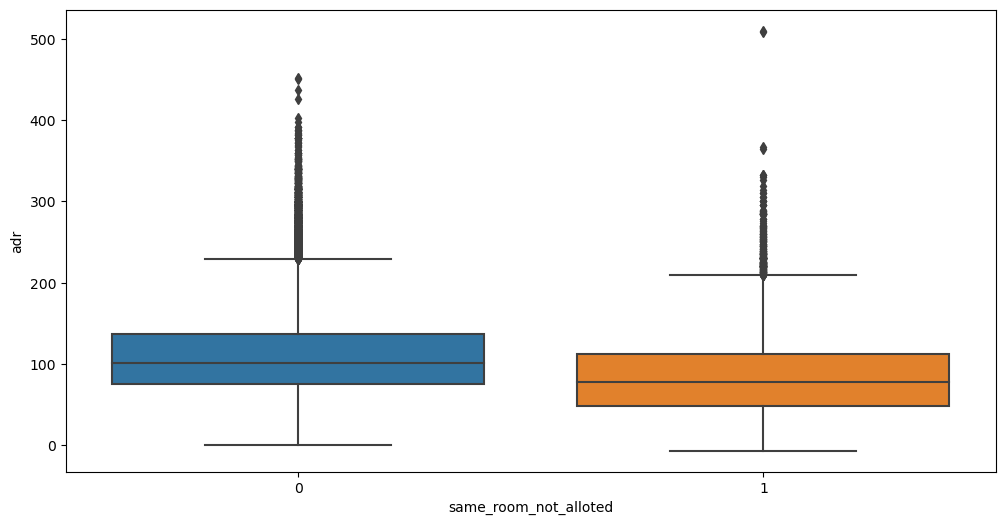

In [111]:
plt.figure(figsize = (12,6))
sns.boxplot(x = 'same_room_not_alloted', y = 'adr', data = df)
plt.show()

So not getting same room do affects the adr, people who didn't got same room have paid a little lower adr, except for few exceptions.

# (4) Time wise analysis
#### Now lets see which month results in high revenue

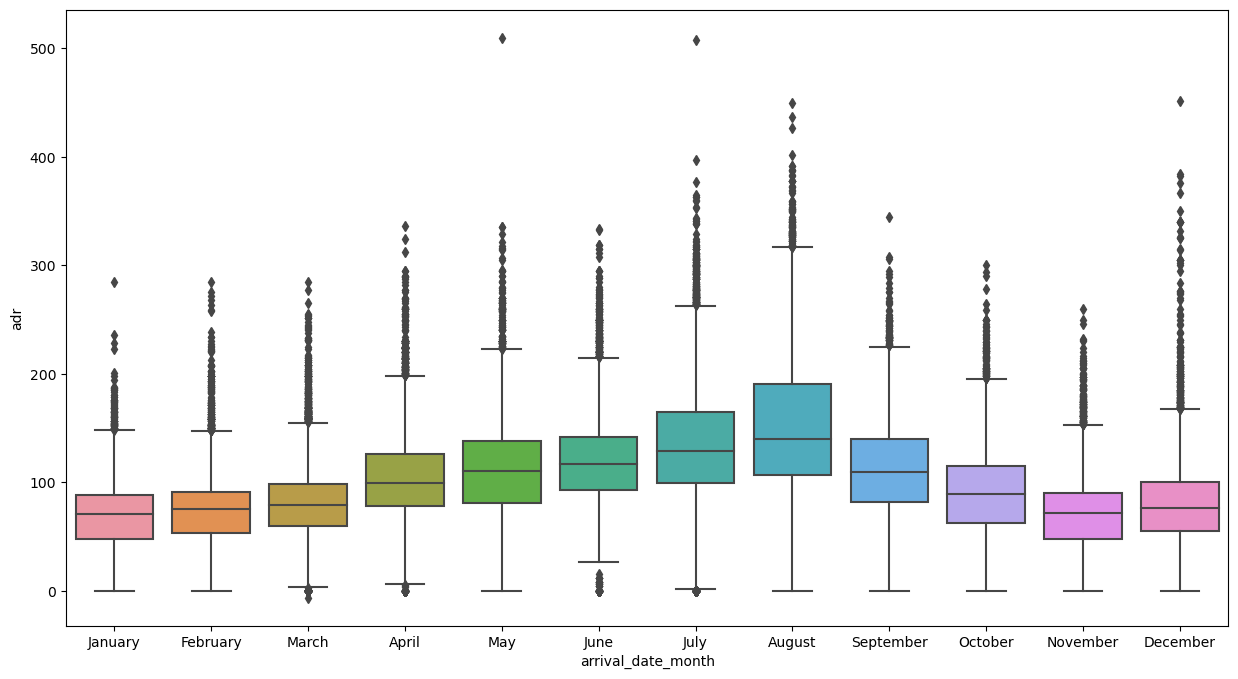

In [113]:
reindex = ['January', 'February','March','April','May','June','July','August','September','October','November','December']
df['arrival_date_month'] = pd.Categorical(df['arrival_date_month'],categories=reindex,ordered=True)
plt.figure(figsize = (15,8))
sns.boxplot(x = df['arrival_date_month'],y = df['adr'])
plt.show()

Avg adr rises from beginning of year upto middle of year and reaches peak at August and then lowers to the end of year. But hotels do make some good deals with high adr at end of year also.

Now let us check the trend of arrival_num and avg adr for each day of month.

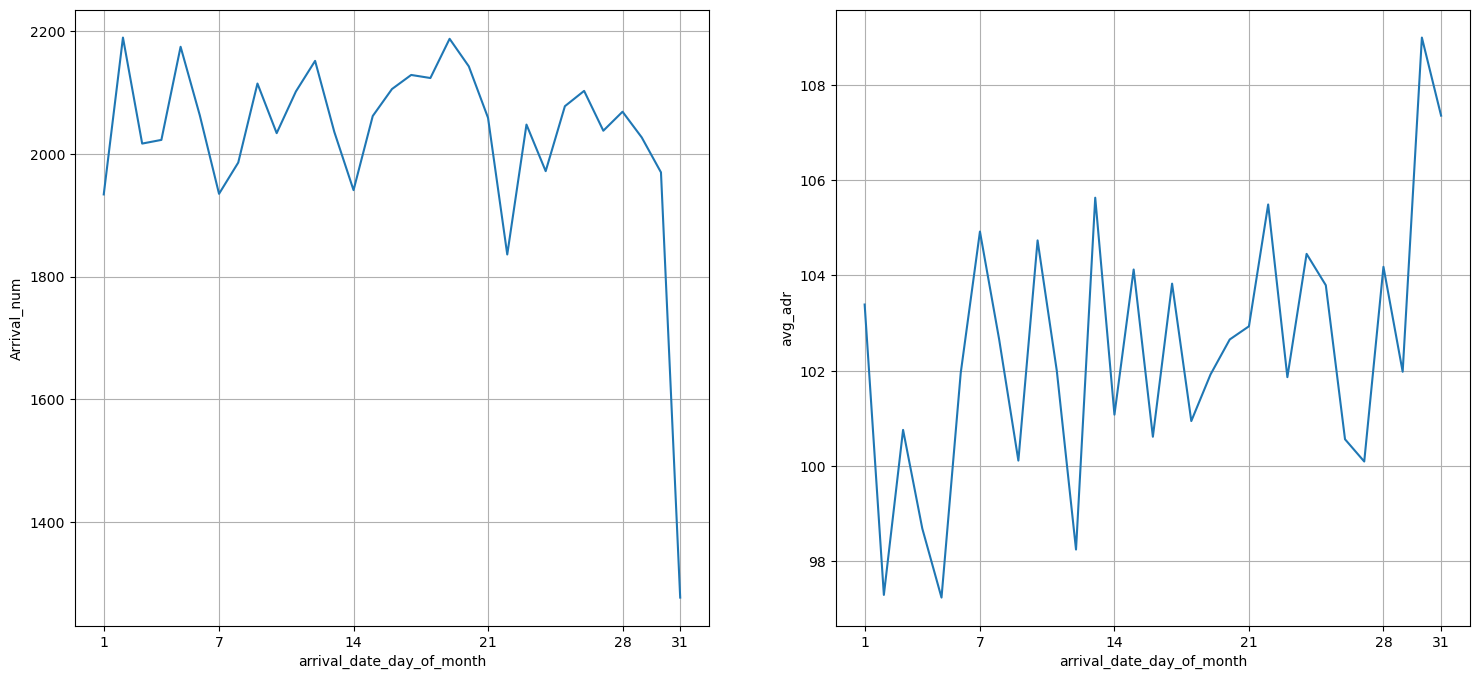

In [114]:
d6 = pd.DataFrame(not_canceled.groupby('arrival_date_day_of_month').size()).rename(columns = {0:'Arrival_num'})
d6['avg_adr'] = not_canceled.groupby('arrival_date_day_of_month')['adr'].agg(np.mean)
fig, axes = plt.subplots(1, 2, figsize=(18, 8))

# Plotting arrival num for each day of month
g = sns.lineplot(ax = axes[0],x = d6.index, y = d6['Arrival_num'])
g.grid()
g.set_xticks([1,7,14,21,28,31])
g.set_xticklabels([1,7,14,21,28,31])

# Plotting avg adr for each day of month
h = sns.lineplot(ax = axes[1],x = d6.index, y = d6['avg_adr'])
h.grid()
h.set_xticks([1,7,14,21,28,31])
h.set_xticklabels([1,7,14,21,28,31])

plt.show()

We can see that graph Arrival_num has small peaks at regular interval of days. This can be due to increase in arrival weekend.

Also the avg adr tends to go up as month ends. Therefore charge more at the end of month.

Let us divide our customers in three categories of single, couple and family/friends. then check their booking %

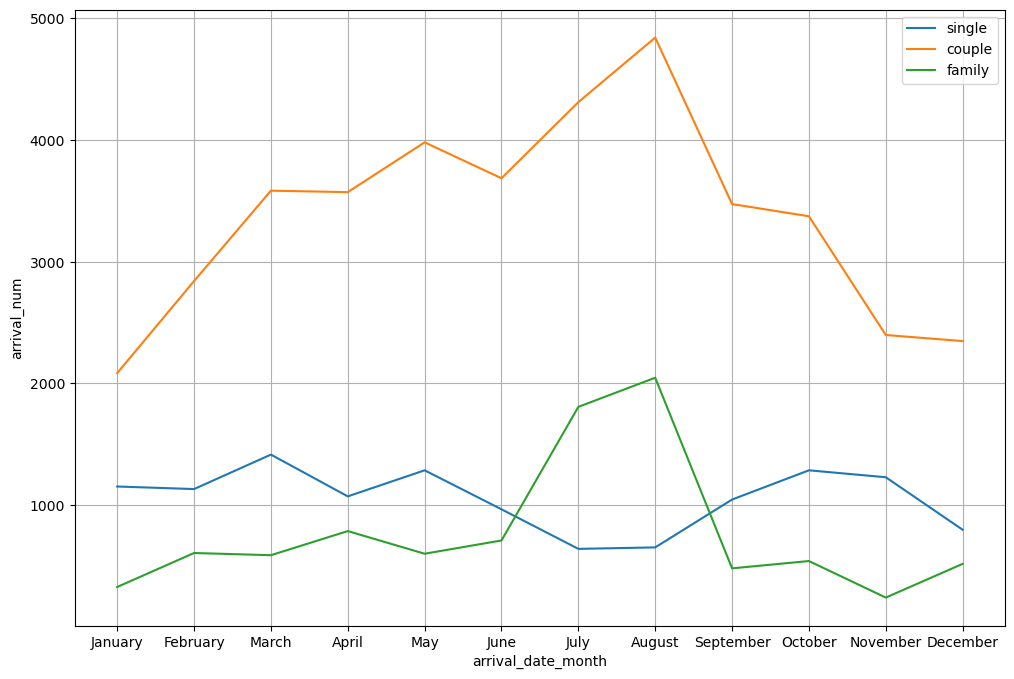

In [115]:
## Select single, couple, multiple adults and family
single   = not_canceled[(not_canceled['adults']==1) & (not_canceled['children']==0) & (not_canceled['babies']==0)]
couple   = not_canceled[(not_canceled['adults']==2) & (not_canceled['children']==0) & (not_canceled['babies']==0)]
family   = not_canceled[not_canceled['adults'] + not_canceled['children'] + not_canceled['babies'] > 2]

reindex = ['January', 'February','March','April','May','June','July','August','September','October','November','December']

fig, ax = plt.subplots(figsize=(12, 8))

for type in ['single', 'couple', 'family']:
  d1 = eval(type).groupby(['arrival_date_month']).size().reset_index().rename(columns = {0:'arrival_num'})
  d1['arrival_date_month'] = pd.Categorical(d1['arrival_date_month'],categories=reindex,ordered=True)
  sns.lineplot(data=d1, x= 'arrival_date_month', y='arrival_num', label=type, ax=ax)
  
plt.grid()
plt.show()

Moslty bookings are done by couples(although we are not sure that they are couple as data doesn't tell about that)

It is clear from graph that their is a sudden surge in arrival num of couples and family in months of July and August. So better plans can be planned accordingly at that time for these type of customers.